In [2]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from collections import OrderedDict

In [6]:
url = (r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

whp = pd.read_csv(url)

whp.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [40]:
whpupdate1=whp.rename(columns={'Happiness Rank': 'happiness_rank', 'Happiness Score': 'happiness_score', 'Standard Error': 'standard_error','Economy (GDP per Capita)': 'economy_gdp_per_capita', 'Health (Life Expectancy)': 'health_life_expectancy', 'Trust (Government Corruption)': 'trust_govt_corpt', 'Dystopia Residual': 'dystopia_residual'})
whpupdate1
whpupdate1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 158 non-null    object 
 1   Region                  158 non-null    object 
 2   happiness_rank          158 non-null    int64  
 3   happiness_score         158 non-null    float64
 4   standard_error          158 non-null    float64
 5   economy_gdp_per_capita  158 non-null    float64
 6   Family                  158 non-null    float64
 7   health_life_expectancy  158 non-null    float64
 8   Freedom                 158 non-null    float64
 9   trust_govt_corpt        158 non-null    float64
 10  Generosity              158 non-null    float64
 11  dystopia_residual       158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


Text(0, 0.5, 'GDP Percapita')

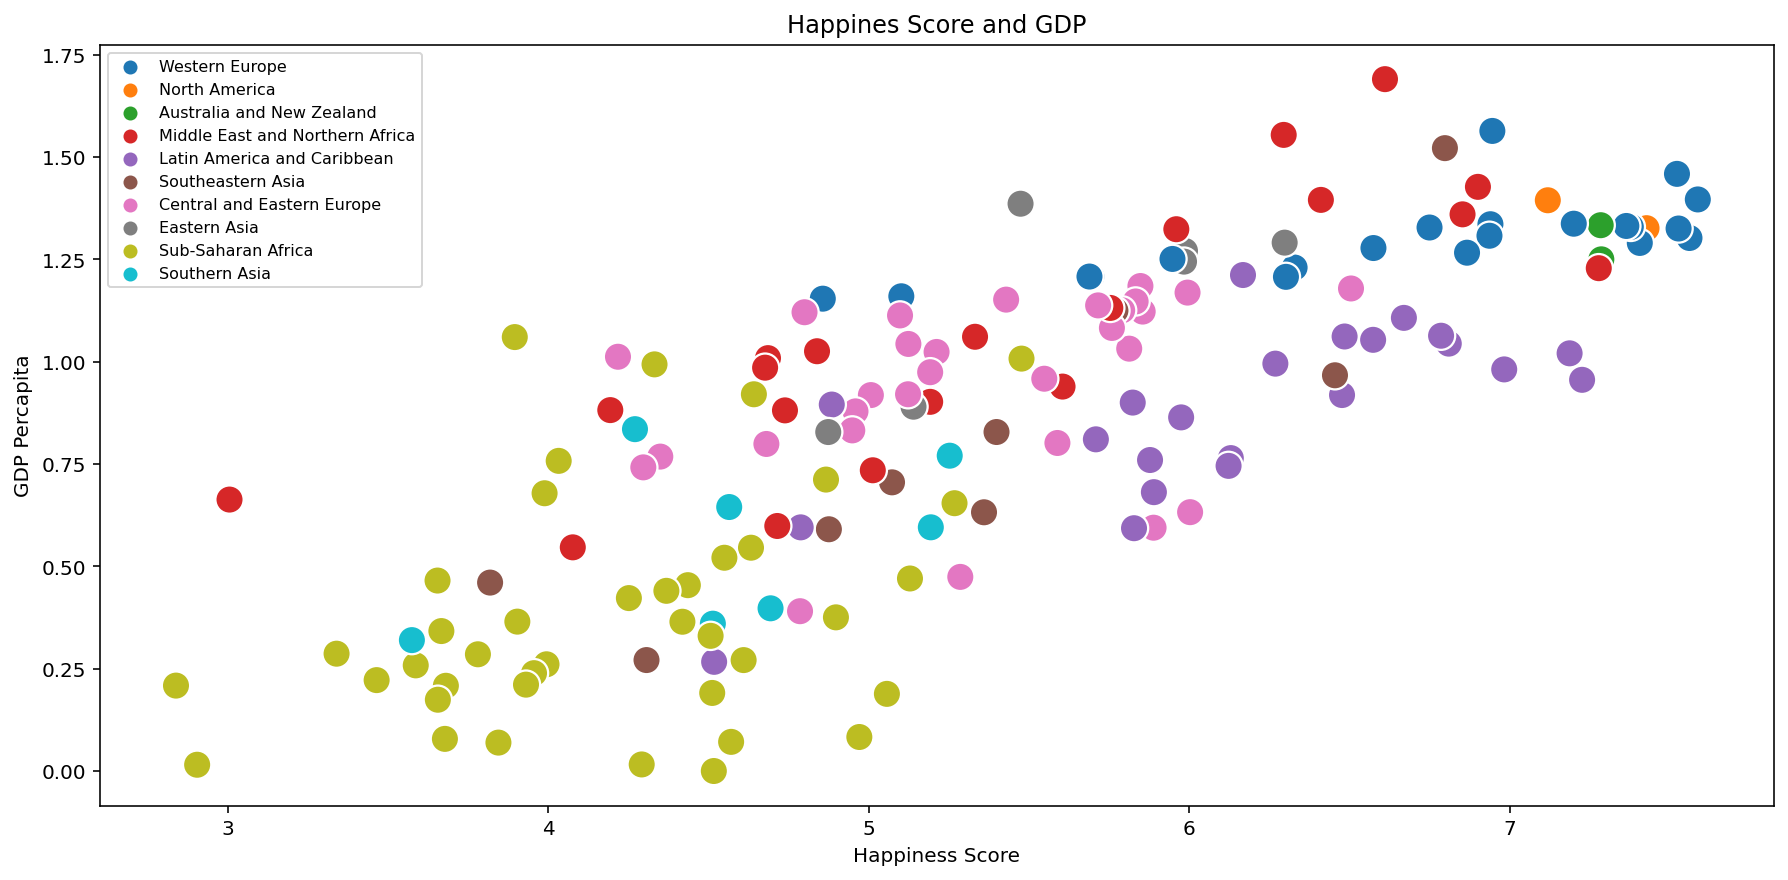

In [42]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Happines Score and GDP')
sns.scatterplot(x = whpupdate1.happiness_score, y = whpupdate1.economy_gdp_per_capita, hue = whpupdate1.Region, s = 200);

plt.legend(loc = 'upper left', fontsize = '8')
plt.xlabel("Happiness Score")
plt.ylabel("GDP Percapita")

In [43]:
gdp_region = whpupdate1.groupby('Region')['economy_gdp_per_capita'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: economy_gdp_per_capita, dtype: float64

Text(0, 0.5, '')

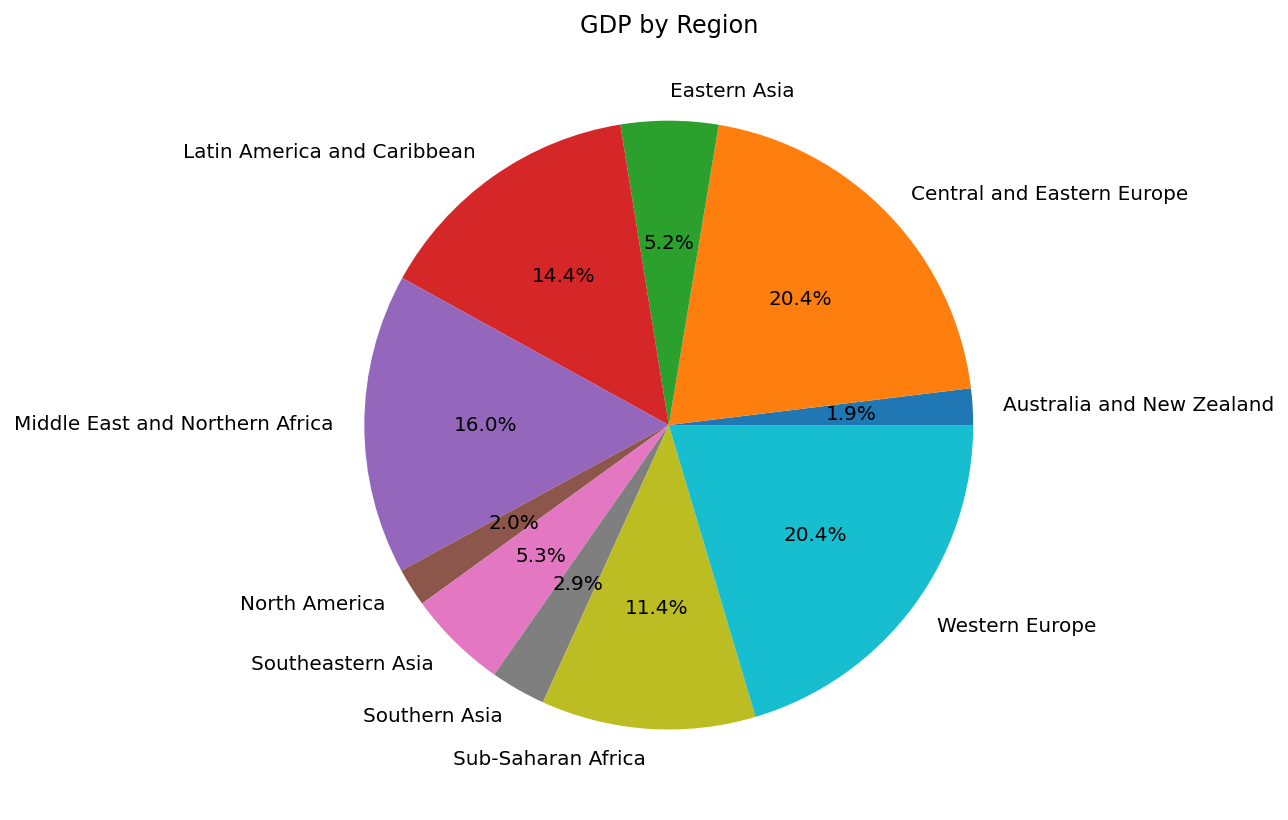

In [44]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')


In [45]:
total_country = whpupdate1.groupby('Region')[['Country']].count()
total_country

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


<AxesSubplot:>

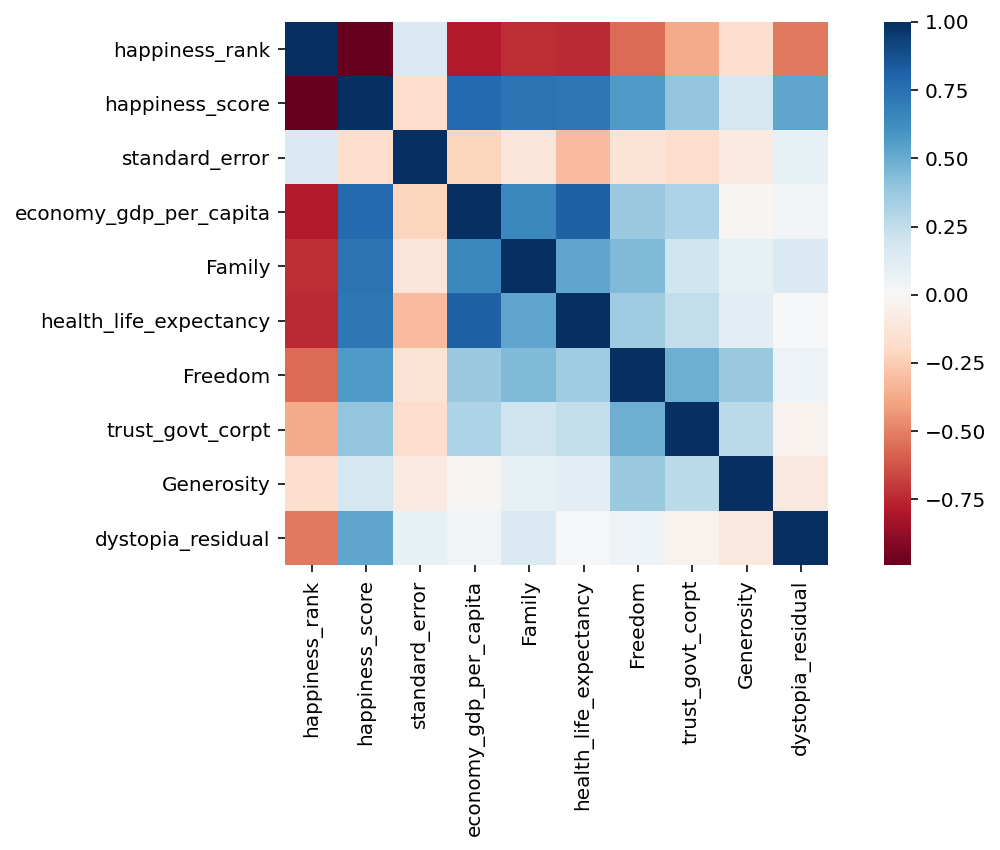

In [50]:
cor = whpupdate1.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool_), cmap="RdBu", square=True, ax=ax)


In [51]:
corruption = whpupdate1.groupby('Region')[["trust_govt_corpt"]].mean()
corruption

,trust_govt_corpt
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

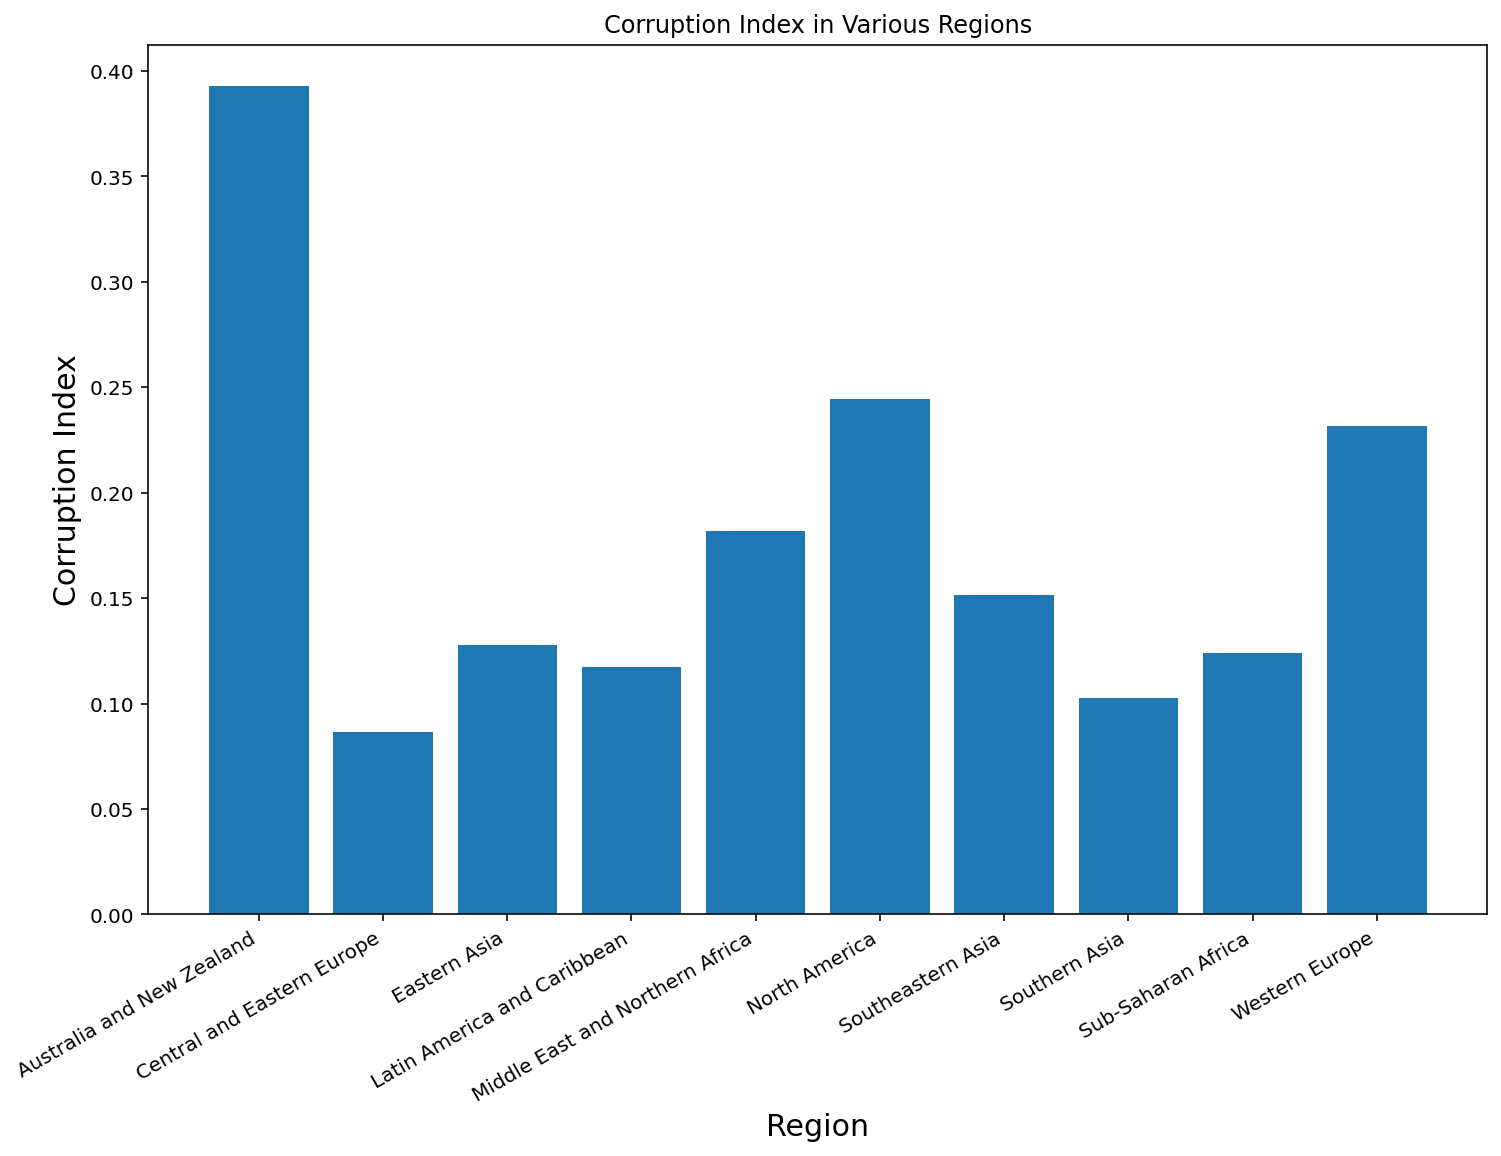

In [54]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Corruption Index in Various Regions')
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption.trust_govt_corpt)

In [96]:
top_10 = whpupdate.head(10)
bottom_10 = whpupdate.tail(10)

Text(117.0, 0.5, 'Life Expectancy')

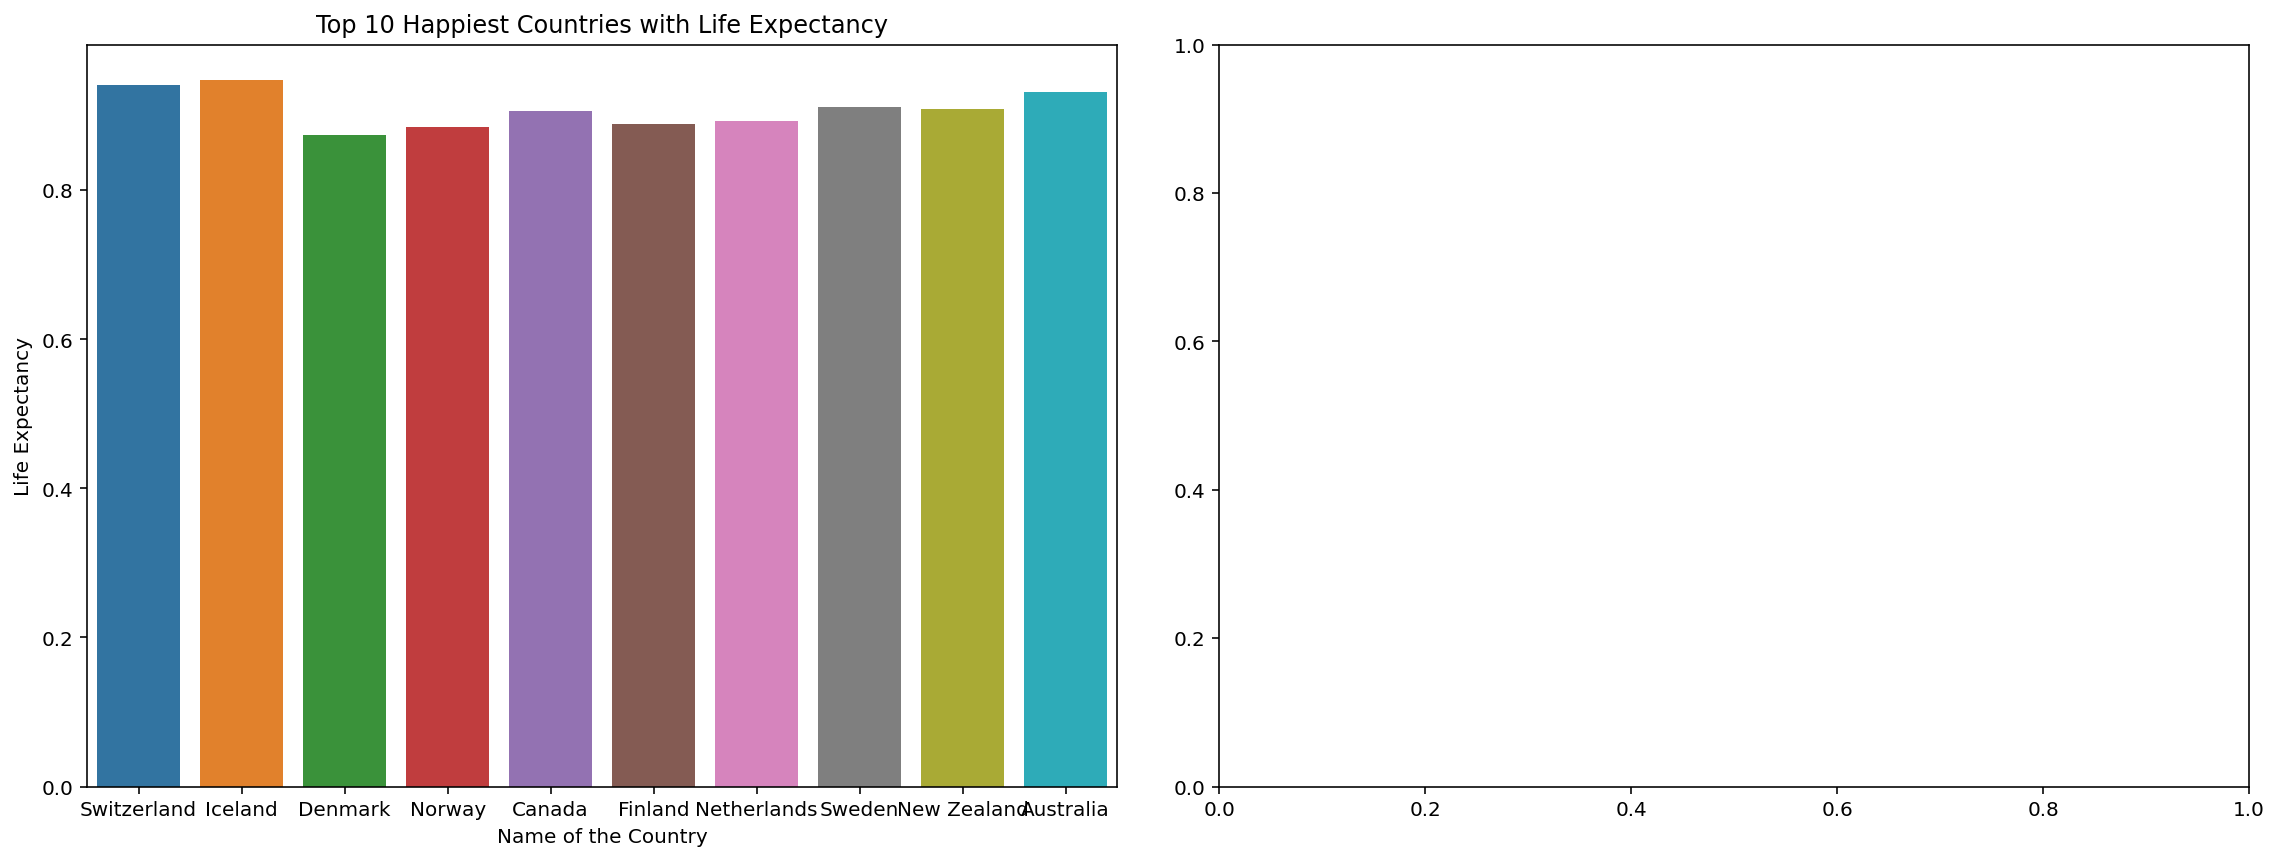

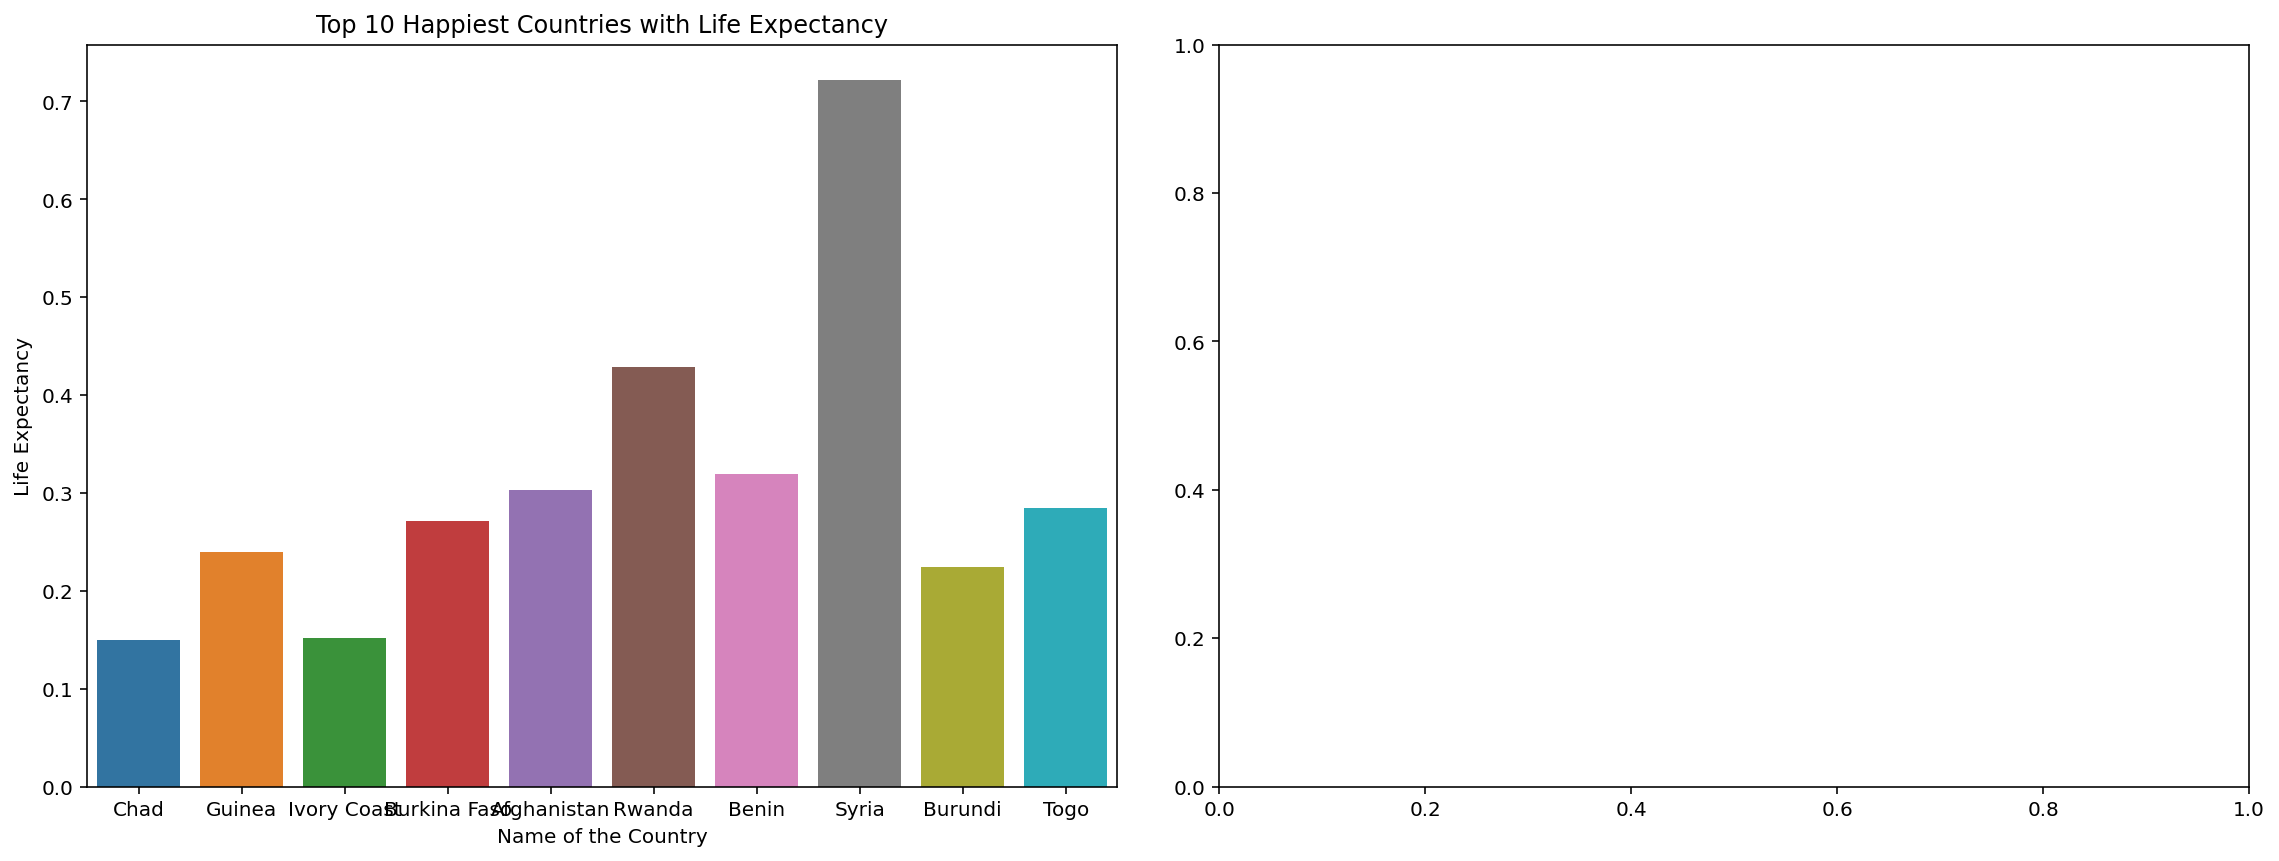

In [135]:
fig, axes= plt.subplots (1,2, figsize= (16,6))
plt.tight_layout(pad= 2)
xlabels= top_10.Country
axes[0].set_title('Top 10 Happiest Countries with Life Expectancy')
sns.barplot(x=top_10.Country, y=whpupdate1.health_life_expectancy, ax= axes[0])
axes[0].set_xlabel('Name of the Country')
axes[0].set_ylabel('Life Expectancy')

fig, axes= plt.subplots (1,2, figsize= (16,6))
plt.tight_layout(pad= 2)
xlabels= bottom_10.Country
axes[0].set_title('Top 10 Happiest Countries with Life Expectancy')
sns.barplot(x=bottom_10.Country, y=whpupdate1.health_life_expectancy, ax= axes[0])
axes[0].set_xlabel('Name of the Country')
axes[0].set_ylabel('Life Expectancy')

Text(0, 0.5, 'Happines Level')

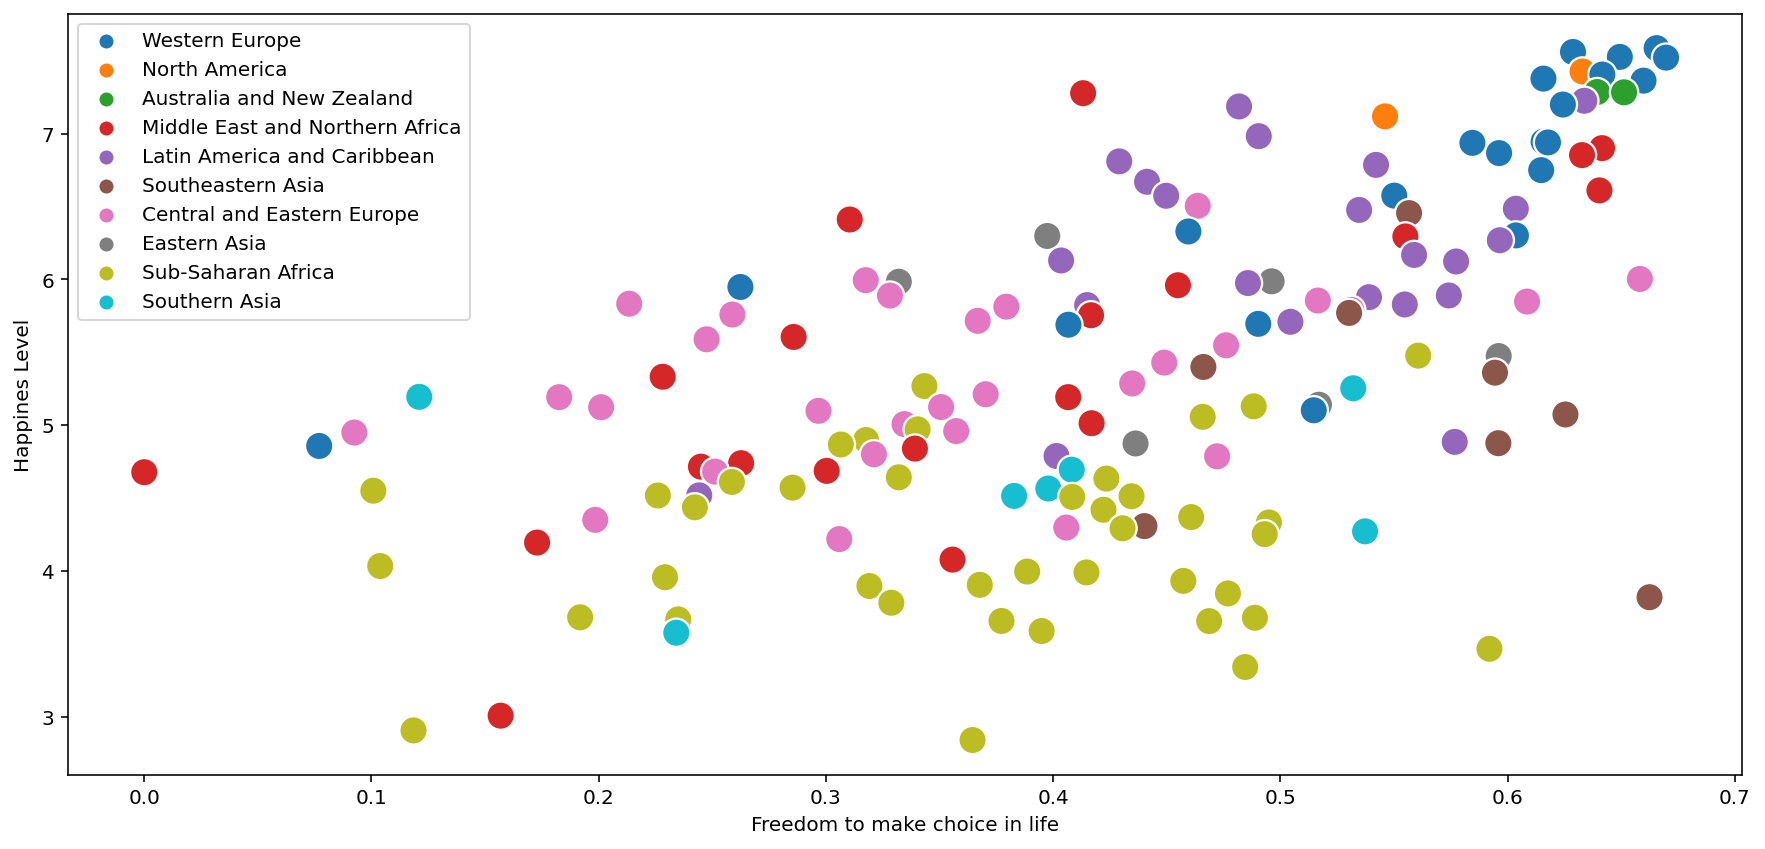

In [136]:
plt.rcParams['figure.figsize']=(15, 7)
sns.scatterplot(x = whpupdate1.Freedom, y=whpupdate1.happiness_score, hue = whpupdate1.Region, s = 200)
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Freedom to make choice in life')
plt.ylabel('Happines Level')

<BarContainer object of 10 artists>

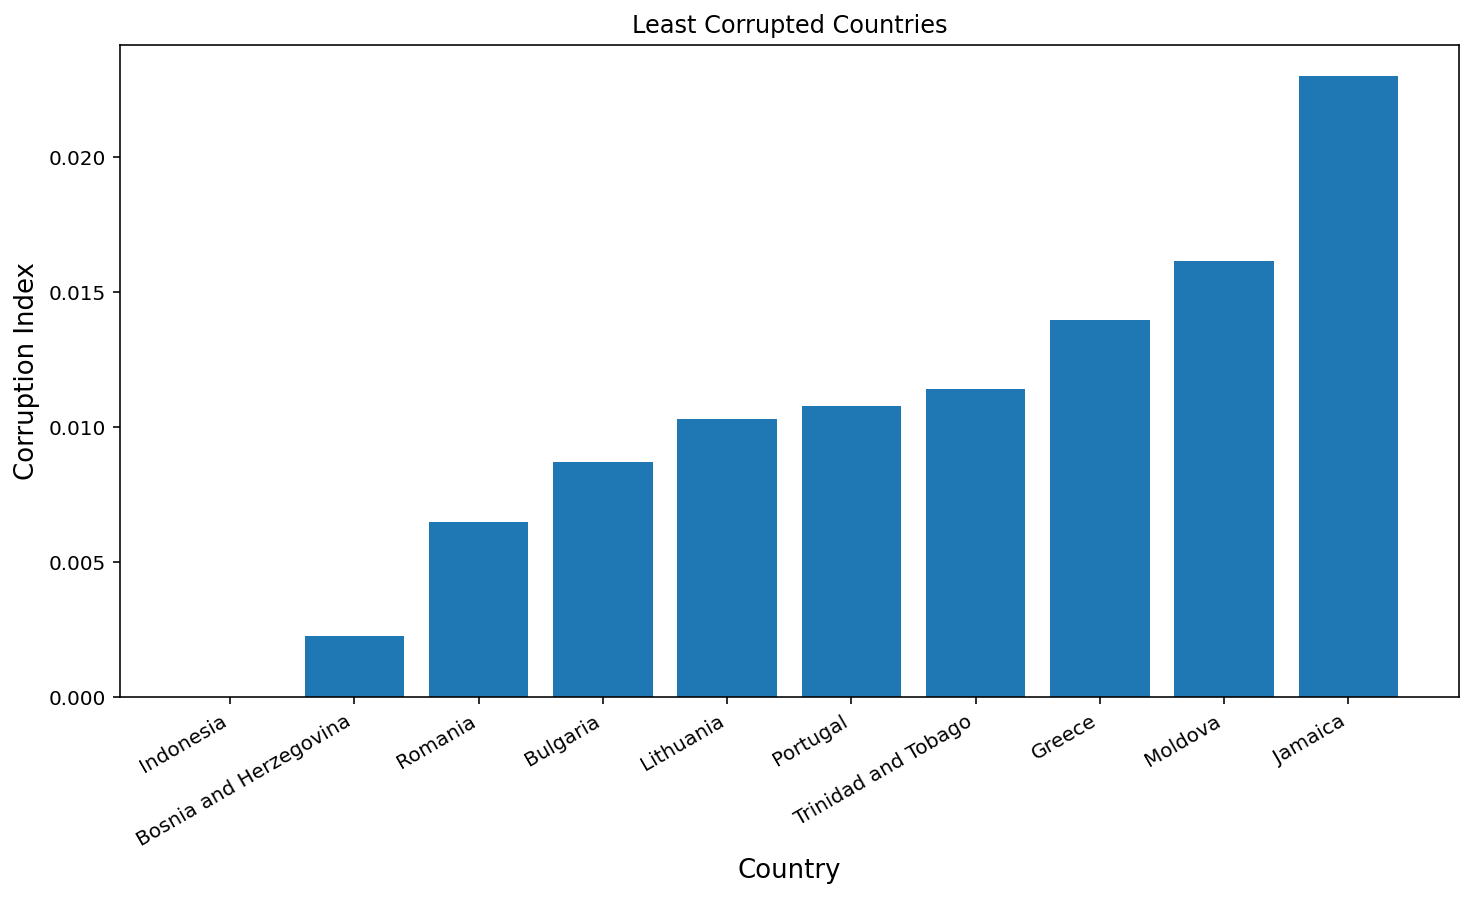

In [142]:
countries = whpupdate1.sort_values(by='trust_govt_corpt').head(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Least Corrupted Countries')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(countries.Country, countries.trust_govt_corpt)

Text(0, 0.5, 'Corruption')

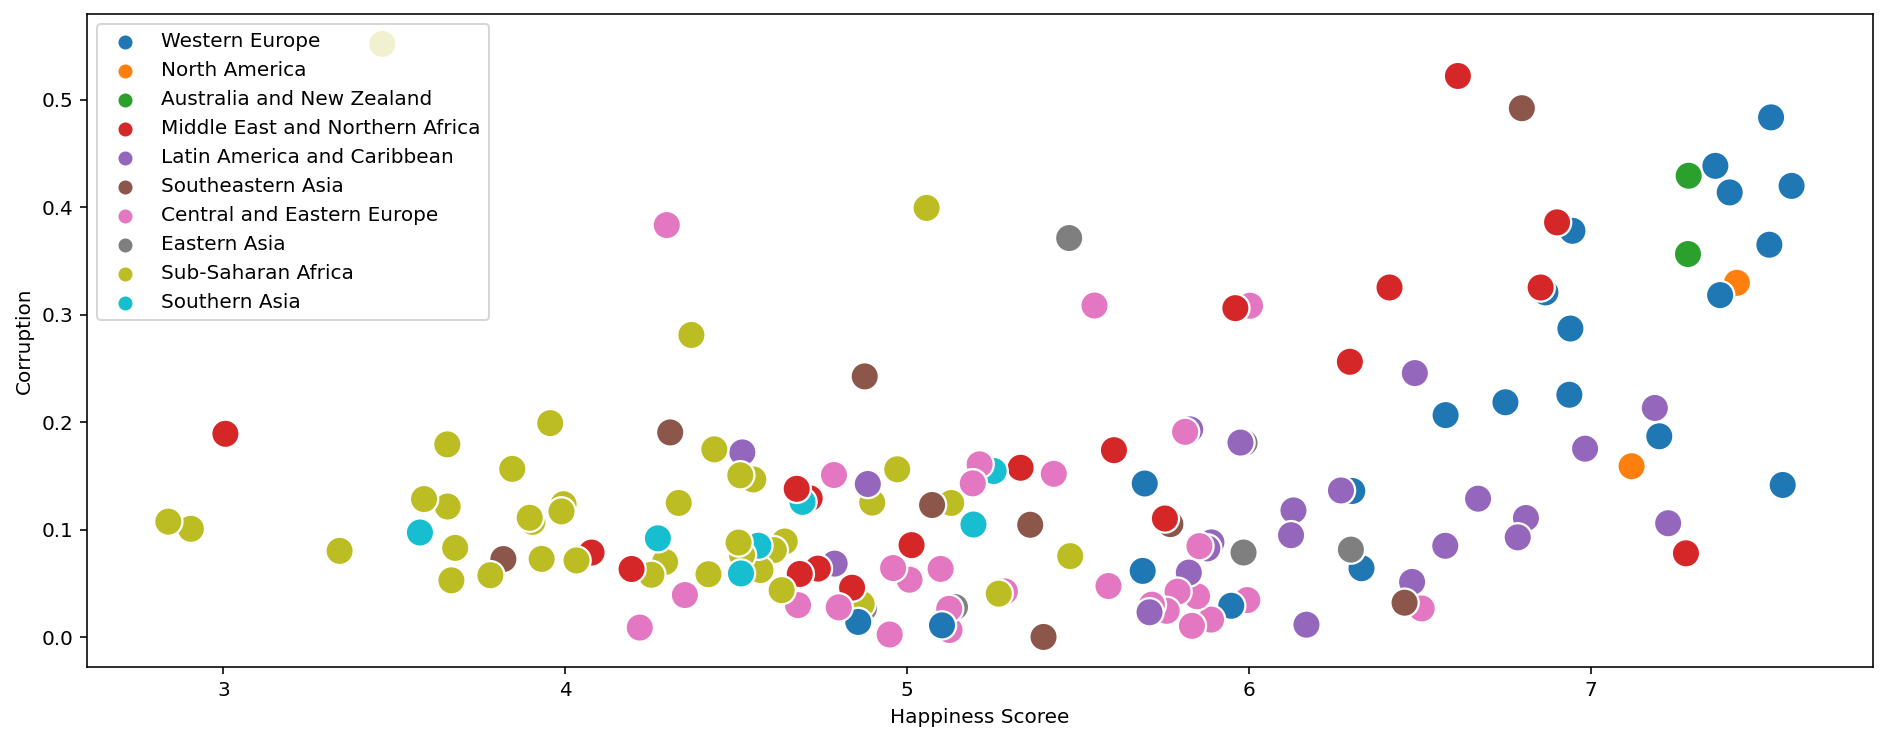

In [143]:
plt.rcParams['figure.figsize'] = (16, 6)
sns.scatterplot(x = whpupdate1.happiness_score, y=whpupdate1.trust_govt_corpt, hue = whpupdate1.Region, s = 200)
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Scoree')
plt.ylabel('Corruption')